# $\S$ Question 3: (Python)
**Given a List of numbers (j) and a number (p), return the minimum and maximum of (p) numbers in given (j) list.**

In [38]:
j = [4,4,4,9,10,11,12]
p = 3

ma = []

def moving_avg(list_numbers, single_number):
    for i in range(len(j)):
        if (i+3) < len(j)+1:
            ma.append(sum(j[i:i+3])/p)

    print("Minimum Moving Average:", min(ma), "Maximimum Moving Average:",  max(ma))

In [39]:
moving_avg(j, p)

Minimum Moving Average: 4.0 Maximimum Moving Average: 11.0


 # $\S$ Question 4: (Python)
 What fraction of active users sent messages to at least 9 unique people on March 1, 2018? You should be able to write complete code to answer this, given just the schema above. Solution will be provided in Python for premium users

In [45]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_message_app_data.csv')
df.head()

,date,sender_id,receiver_id
0,2018-03-01,5,2
1,2018-03-01,8,6
2,2018-03-01,1,2
3,2018-03-01,4,8
4,2018-03-01,2,7


In [46]:
df['date'] = pd.to_datetime(df['date'])

In [47]:
df_march_first = df[df['date'] == '2018-03-01']

In [50]:
df_march_first['sender_id'].value_counts()

4     63
1     58
2     50
6     49
5     49
8     43
3     42
10    39
9     35
7     31
Name: sender_id, dtype: int64

In [60]:
len(df_march_first[df_march_first['sender_id'] == 9]['receiver_id'].value_counts())

9

In [56]:
l = [4, 1, 2, 6, 5, 8, 3, 10, 9, 7]

for i in l:
    print('sender_id: ' + str(i) + '  ' + 'unique_receivers: ' + str(len(df_march_first[df_march_first['sender_id'] == i]['receiver_id'].value_counts())))

sender_id: 4  unique_receivers: 9
sender_id: 1  unique_receivers: 9
sender_id: 2  unique_receivers: 9
sender_id: 6  unique_receivers: 9
sender_id: 5  unique_receivers: 9
sender_id: 8  unique_receivers: 9
sender_id: 3  unique_receivers: 9
sender_id: 10  unique_receivers: 9
sender_id: 9  unique_receivers: 9
sender_id: 7  unique_receivers: 8


In [62]:
9/10

0.9

# $\S$  Question 5:  (SQL)
**Suppose you're consulting for a company, and you've sent out a survey that asks successive qustions randomly. The survey logs data into a table called survey_logging. The schema of the table is:**

|Column Name|Data Type|Description|
|---|---|---|
|employee_id|integer|employee id of the survey respondant|
action|string|Will be one of the following values, 'view', 'answer', 'skip'
question_id|integer|ID of the question asked
answer_id|integer|ID of the answer asked
timestamp|integer|time stamp of the action made by respondant
  
**Using SQL, find which question has the highest response rate.**

In [ ]:
%SQL

SELECT TOP(1)question_id
    ,  COUNT(*) as response_count
FROM survey_logging
GROUP BY question_id
ORDER BY response_count DESC

#  $\S$ Question 6: (Python)
Create a Python function that generates the power set given a set of values. For example, if you're given the following set:

set = {1, 2, 3}

Your python function should return the corresponding power set (note this can be a formatted as a list of lists):

power set = [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [1]:
import itertools

s = {1, 2, 3}

def power_set(boboo):
    
    sets = [[]]
    
    sorted_sets = []
    
    for i in boboo:
        sets.append([i])
        
        for j in boboo:
            if len(set([i,j])) == len([i,j]):
                sets.append([i, j])
                
            for z in boboo:
                if len(set([i, j, z])) == len([i,j,z]):
                    sets.append([i,j,z])

    for i in sets:
        sorted_sets.append(sorted(i))
        
    sorted_sets.sort()
    answer = list(sorted_sets for sorted_sets,_ in itertools.groupby(sorted_sets))
    
    return answer

In [65]:
power_set(s)

[[], [1], [1, 2], [1, 2, 3], [1, 3], [2], [2, 3], [3]]

# $\S$ Question 7: (Baye's)
**Given the information below, if you had a good first interview, what is the probability you will receive a second interview?**

-  50% of all people who received a first interview received a second interview
-  95% of people that received a second interview had a good first interview
-  75% of people that did not receive a second interview had a good first interview



***Baye's Theory:***
$P(A\mid B) = \frac{P(B\mid A) \cdot P(A)} {P(B)}$



- A (receive second interview), B(first interview went well)	=	events
- P(A|B)	=	probability of A given B is true
- P(B|A)	=	probability of B given A is true
- P(A), P(B)	=	the independent probabilities of A and B

In [9]:
P_A = .50
P_B_given_A = .95
P_B = .85    ## because 95% of second round interviewers received a good interview... (47.5%)
             ## but also have to include 75% of people that did not receive second interview, yet had good first interview. (37.5%)

P = (P_B_given_A * P_A)/P_B

P

0.5588235294117647

# $\S$ Question 8: (Python)
**Given an array a, write a function to feed in the array elements and check whether they can all be made equal by only multiplying the numbers by 2 or 7. (you can multiply by these #s as many times as you like)**

If all elements can be made equal, return False, otherwise return True.

**Example:**

#Input
a = [128, 4, 2]

#Here, we can turn all elements into 128, by multiplying by 2
#128, 4*2*2*2*2*2 = 128, 2*2*2*2*2*2*2 = 128

#Output:
#True

#Input
a = [65, 4, 2]
#Here, we cannot make all elements equal through multiplication by 2 or 7, 
#so we return false

#Output:
#False

In [17]:
a = [65, 4, 2]

def divisibility(elements):
    
    list_one = []
    list_two = []
    list_three = []
    
    one = elements[0]
    two = elements[1]
    three = elements[2]
    
    for i in range(1000):
        list_one.append((2**i) * one)
        list_two.append((2**i) * two)
        list_three.append((2**i) * three)
        list_one.append((7**i) * one)
        list_two.append((7**i) * two)
        list_three.append((7**i) * three)
        
    list_one.append(one)
    list_two.append(two)
    list_three.append(three)
        
    set_one = set(list_one)
    set_two = set(list_two)
    set_three = set(list_three)
    
    if (set_one & set_two & set_three):
        return True
    else:
        return False
        
    


In [18]:
print(divisibility(a))

False


# Question 9: (Python)
**You are given a dataset with information around messages sent between users in a P2P messaging application. Below is the dataset's schema:**

| Column Name |	Data Type |	Description |
|---|---|---|
|date|	string|	date of the message sent/received, format is 'YYYY-mm-dd'|
|timestamp | integer | timestamp of the message sent/received, epoch seconds |
|sender_id|	integer|	id of the message sender|
|receiver_id|	integer|	id of the message receiver|

**Given this, write code to find the fraction of messages that are sent between the same sender and receiver within five minutes (e.g. the fraction of messages that receive a response within 5 minutes).**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\NMontoya\Documents\Custom Office Templates\Copy of Sample Message Dataset - Sheet1.csv')

In [2]:
df.head()

,date,timestamp,sender_id,receiver_id
0,2018-03-01,1519923378,1,5
1,2018-03-01,1519942810,1,4
2,2018-03-01,1519918950,1,5
3,2018-03-01,1519930114,1,2
4,2018-03-01,1519920410,1,2


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [4]:
df.sort_values(by=['timestamp']).head()

,date,timestamp,sender_id,receiver_id
38,2018-03-01,2018-03-01 00:56:40,7,4
81,2018-03-01,2018-03-01 01:00:04,4,7
5,2018-03-01,2018-03-01 01:45:47,2,3
48,2018-03-01,2018-03-01 01:45:58,3,2
7,2018-03-01,2018-03-01 03:07:13,2,2


In [11]:
df[((df['sender_id'] == 7) & (df['receiver_id'] == 4)) | ((df['sender_id'] == 4) &( df['receiver_id'] == 7))].sort_values(by=['timestamp'])

,date,timestamp,sender_id,receiver_id
38,2018-03-01,2018-03-01 00:56:40,7,4
81,2018-03-01,2018-03-01 01:00:04,4,7
34,2018-03-01,2018-03-01 07:33:53,7,4
77,2018-03-01,2018-03-01 07:58:22,4,7
18,2018-03-01,2018-03-01 09:34:57,4,7
61,2018-03-01,2018-03-01 09:39:41,7,4


# Question 10: (SQL)
**Given the following table schemas, how would you figure out the overall attendance rate for each grade on 2018-03-12?**

Table 1:

| Column Name  | Date Type  |Description   | 
|---|---|---|
| Date  |  string | date of log per student_id, format is 'yyyy-mm-dd'  |
|student_id   | integer  | id of a student|
| attendance_status  | string  | Possible values are ['present', 'tardy', 'absent']  |


Table 2:

| Column Name  |Date Type   | Description  |
|---|---|---|
| student_id  |  integer | id of the student  |
| grade_level  | integer  | will be a value of 0-12, which corresponds  |
| date_of_birth  | string  | Student birth date, format is 'yyyy-mm-dd'  |

# $\S$ Question 11: (ML Concepts)
**Can you explain what the Bias-Variance Tradeoff is? Can you share an example of when you might want to use a biased estimator? Think about this in the context of machine learning and training data.**

Answer: Bias-Variance Tradeoff is the dilemma of trying when you try to minimize bias in a model, you tend to increase variance, and vice versa.  Ideally both bias and variance are minimized.  The issue with bias, is that although it generalizes things, too much of it can cause a model to miss important relationships that actually improve forecasting.  In other words, high bias can lead to the underfitting of a model.  On the other hand, high variance will capture almost any relationship in data. Too much of it of course will lead to overfitting.  

**research why and when you might want to use a biased estimator.. this ideas seems importantv**

# Question 12: (Python)
**Suppose you are given a list of Q 1D points. Write code to return the value in Q that is the closest to value j. If two values are equally close to j, return the smaller value.**

**Example:**

Q = [1, -1, -5, 2, 4, -2, 1]

j = 3

#Output: 2

In [ ]:
Q = [1, -1, -5, 2, 4, -2, 1]
J = 3

def closest_number(number_list, target):
    

# Question 13: (Python)

**Company XYZ recently migrated database systems causing some of the date_joined records to be NULL. You're told by an analyst in human resources NULL records for the date_joined field indicates the employees joined prior to 2010. You also find out there are multiple employees with the same name and duplicate records for some employees.**

**Given this, write code to find the number of employees that joined each month. You can group all of the null values as Dec 1, 2009.**

In [60]:
import pandas as pd
from datetime import datetime
from dateutil.parser import parse
import numpy as np
raw_data = {'employee_name': ['Andy', 'Beth', 'Cindy', "Dale"],
            'employee_id': [123456,789456,654123,963852],
            'date_joined': ['2015-02-15', np.nan, '2017-05-16', "2018-01-15"],
            'age': [45,36,34,25],
            'yrs_of_experience': [24,14,14,4]}
df = pd.DataFrame(raw_data, columns = ['employee_name', 'employee_id', 'date_joined','age', 'yrs_of_experience'])
df

,employee_name,employee_id,date_joined,age,yrs_of_experience
0,Andy,123456,2015-02-15,45,24
1,Beth,789456,NaN,36,14
2,Cindy,654123,2017-05-16,34,14
3,Dale,963852,2018-01-15,25,4


In [62]:
import datetime

df = df.fillna(pd.Timestamp('20091201'))

In [64]:
df['date_joined'] = pd.to_datetime(df['date_joined'])

In [72]:
df.index = df['date_joined']

In [76]:
df.resample('M').count().head()

,employee_name,employee_id,date_joined,age,yrs_of_experience
date_joined,,,,,
2009-12-31,1,1,1,1,1
2010-01-31,0,0,0,0,0
2010-02-28,0,0,0,0,0
2010-03-31,0,0,0,0,0
2010-04-30,0,0,0,0,0


# $\S$Question 14: (SQL)

**Below are two table schemas for a popular music streaming application:**

Table 1: user_song_log

|Column_name| Data_type| Description|
|---|---|---|
|user_id|id|id of streaming user|
|timestamp|integer|	timestamp of when the user started listening to the song, epoch seconds|
|song_id|integer|id of song|
|artist_id|integer|id of artist|

Table 2: song_info

|Column_name|data_type|description|
|---|---|---|
|song_id|integer|id of song|
|artist_id|integer|id of artist|
|song_length|integer|length of song in seconds|

**Given the above, can you write a SQL query to estimate the average number of hours a user spends listening to music daily? You can assume that once a given user starts a song, they listen to it in its entirety.**

In [ ]:
%SQL

SELECT usl.user_id
    ,  AVG(tt.time_listened_day) AS avg_time_listened_day
FROM user_song_log usl
LEFT JOIN
    (SELECT usl.user_id,
        ,  SUM(si.song_length) AS time_listened_day
        ,  DATE(FROM_UNIXTIME(timestamp)) as Day
    FROM user_song_log usl
    LEFT JOIN song_info si ON si.song_id = usl.song_id
    GROUP BY usl.user_id, DATE(FROM_UNIXTIME(timestamp))
    ORDER BY Day) tt ON tt.user_id = usl.user_id
GROUP BY usl.user_id

# Question 15: (Probability)

**Suppose we have a standard (52 card) deck of cards. Each card has an equal chance of being one of the four "suits" (e.g. clubs, spades, diamonds, and hearts).**

### **Question:**

**If you draw 3 cards from the deck, one at a time, what is the probability that you draw a club, a heart, and a diamond in that order?**

# Question 16: (Python)

**Suppose you are given P, which is list of j integer intervals, where j is the number of intervals. The intervals are in a format [a, b].**

**Given an integer z, can you return the number of overlapping intervals for point z?**

**For example:**

#Input:
P =  [[0, 2], [3, 7], [4, 6], [7, 8], [1 ,5]]
z = 5
#Output:
#3
#At z = 5, there are 3 intervals that overlap. The intervals are: [3, 7], [4, 6], and [1, 5]

# Question 17: (Python)

**Below is a snippet from a table that contains information about employees that work at Company XYZ:**

|Column Name|Data Type|Example Value| Description|
|---|---|---|---|
|Employee_name|string|Cindy|Name of employee|
|Employee_id| integer| 1837204| Unique id for each employee|
|yrs_of_experience| interger| 14| total working years of experience|
|yrs_at_a_company| integer| 10| total working years at company XYZ|
|compensation| integer| 100000| dollar value of employee compensation|
|career_track| string| technical| Potential values: technical, non-technical, executive|


**Company XYZ Human Resource department is trying to understand compensation across the company and asked you to pull data to help them make a decision regarding employee compensation.**

**Question: Can you pull the average, median, minimum, maximum, and standard deviations for salary across 5 year experience buckets at Company XYZ? (e.g. get the corresponding average, median, minimum, maximum, and standard deviations for experience buckets 0-5, 5-10, 10-15, etc.)**

**You can assume the data is imported into a dataframe named df. Solution will be provided in Python for premium users.**

# Question 18: (SQL)
**Suppose you're an analyst for a major US hotel chain which has locations all over the US. Your marketing team is planning a promotion focused around loyal customers, and they are trying to forecast how much revenue the promotion will bring in. However, they need help from you to understand how much revenue comes from "loyal" customers to plug into their model.**

**A "loyal" customer is defined as (1) having a membership with your company's point system, (2) having >2 stays at each hotel the customer visited, (3) having stayed at 3 different locations throughout the US.**

**You have a table showing all transactions made in 2017. The schema of the table is below:**

|Column Name| Data type| Description|
|---|---|---|
|customer_id| id| id of customer|
|hotel_id| integer| unique id for hotel|
|transaction_id| integer| unique id for tansaction|
|first_night| string| date of first night in 'YYYY-mm-dd' format|
|number_of_nights| integer| # of nights customer stayed in hotel|
|total_spend| integer| total $ spent|
|is_member| boolean| indicates if customer is member of point system|

**Given this, can you write a SQL query that calculates percent of revenue loyal customers brought in 2017?**

# Question 19:  (Baye's)
**You go to see the doctor about a cough you've had for a while. The doctor selects you at random to have a blood test for a new strain of flu, which for the purposes of this exercise we will say is currently suspected to affect 1 in 10,000 people in the US. The test is 99% accurate, in the sense that the probability of a false positive is 1%.**

**The probability of a false negative is zero. You test positive. What is the new probability that you have this strain of flu?**

# $\S$Question 20: (Python)

**Write a function to return a boolean that indicates if two strings are one edit away from being identical. The function should take in 2 strings and return a boolean.**

**The definition of an 'edit' is as follows:**

- Insert one character
- Remove one character
- Replace one character

**A few examples of inputs and the function result are listed below:**

- OneEditAway('pea', 'peas') = True

- OneEditAway('pea', 'fleas') = False

- OneEditAway('pea', 'lea') = True

- OneEditAway('pea', 'seas') = False

In [42]:
def OneEditAway(first_string, second_string):
    
    count = sum(1 for a, b in zip(seq1, seq2) if a != b) + abs(len(seq1) - len(seq2))
    
    if count == 1:
        return True
    else:
        return False

In [48]:
seq1 = 'pea'
seq2 = 'lea'

OneEditAway(seq1, seq2)

True

# Question 21 (python)

**You're given a set of data that is aggregated on a monthly basis (as illustrated in Table A).**

**Can you write code that can expand this monthly table into a daily table that spreads revenue across the 30 day period (as shown in Table B)?**

**You can assume each month has 30 days and that Table A is in a dataframe named "df".**

Table A:

|Index| Month| Revenue($)|
|---|---|---|
|0|1|300|
|1|2|330|
|2|3|390|

Table B:

|Index|Month|Day|Revenue($)|
|---|---|---|---|
|0|1|1|10|
|1|1|2|10|
|2|1|3|10|
|...|...|...|...|
|30|2|1|11|
|31|2|2|11|
|...|...|...|...|
|60|3|1|13|
|...|...|...|...|
|89|3|30|13|

# Question 22: (SQL)

**You work for a large hardware company (one that manufactures watches, computers, and phones) and you're trying to understand user sentiment towards the company's brand and the products. You decide to send out a survey to a random set of users across different products.
Can you create a query that samples across the different product offerings? The output of your query should be user_id and group (e.g. the sampling group the user belongs to). Your team will use this output to distribute the survey.**

**You have a table with all users and their registered devices. The schema of the table is below:**

Table: user_devices

|Column Name| Data Type| Description|
|---|---|---|
|user_id| integer| id of the user|
|devices| array of strings| lists the devices (watch, laptop,phone)|
|device_ids| array of integers| id of the devices used |
|user_create_time| integer| epoch time of the user account|
|total_spend| integer | lifetime spend of a user|
|country| string| user country|

# $\S$Question 23:  (Probability)

**Suppose we have a standard (52 card) deck of cards, with an equal share of the cards associated with each of the four "suits" (e.g. clubs, spades, diamonds, and hearts). You can read more about a standard card deck [here](https://en.wikipedia.org/wiki/Standard_52-card_deck").**

**Question: If you were to draw 3 cards from the deck, one a time, what is the probability that you draw a club, a heart and a diamond in any order? Be sure you can explain your reasoning here using probablity theory.**

In [1]:
P_first_draw = 39 / 52
P_second_draw = 26 / 51
P_third_draw = 13 / 50

P_c_h_d_any_order = P_first_draw * P_second_draw * P_third_draw

P_c_h_d_any_order

0.09941176470588235

# $\S$ Question 24: (Python)

**Write a function that takes in an integer n, and prints out integers from 1 to n inclusive.**

**Additionally, if %3 == 0 then print "foo" in place of the integer, if %5 == 0 then print "ie" in place of the integer, and if both conditions are true then print "foo-ie" in place of the integer.**

In [20]:
def fooie(n):
    for i in range(n):
        if (i+1) % 3 == 0 and (i+1) % 5 == 0:
            print('foo-ie')
        elif (i+1) % 3 == 0:
            print('foo')
        elif (i+1) % 5 == 0:
            print('ie')
        else:
            print(i+1)

In [21]:
fooie(15)

1
2
foo
4
ie
foo
7
8
foo
ie
11
foo
13
14
foo-ie


# $\S$ Question 25: (Python)

**Your team at Apple released a new feature that collects feedback when an app launches. As part of the Alpha Launch for testing, the feedback consists of 1 question within a dialog box that asks "Would you like to give {App Name} your credit card number?", with potential answers being "Yes" and "No".**

**This data is logged within a table named 'dialogbox_feedback' with the following schema:**

Table: dialogbox_feedback:

|Columne Name| Data Type| Description|
|---|---|---|
|time|integer|epoch time of response|
|user_id|integer|unique user id|
|app_id|integer| unique app id|
|app_name| string| name of application|
|event|string|Possible values are: impressed (when user sees the dialog box), "Yes" (when user clicks yes). There is no logging for when the user clicks "No".|


**Question: A Product Manager asked you to give an update on how the Alpha Launch is going. You decide to aggregate (e.g. pivot) the events by each app to provide a quick summary. Write the aggregation using Python (Pandas).**


In [ ]:
dialogbox_feedback.pivot(index = "event", columns = "app_name")

# $\S$ Question 26: (Probability)

**Is drawing a red card and drawing an ace independent? You can read more about a standard card deck [here](https://en.wikipedia.org/wiki/Standard_52-card_deck"). Hint: Drawing an ace (event A) and drawing a red card (event B) are two separate events -- think of a way to prove (using probability theory) that knowing whether event A occurred impacts the probability of event B occuring.**

Drawing a red card and drawing an ace are independent events.  Unless you are drawing cards without replacing them back into the deck.  With replacement, the probabilty of drawing one or the other does not change. Without replacing, the probability changes no matter what, merely because the deck has one less card, and even less if you happen to draw an ace or a red card in the first draw.

# $\S$ Question 27: (SQL)

**Suppose you work for Airbnb as an analyst. A team has come to you asking which cities generate the highest revenue for the company in 2017. Using the schemas below, write a SQL query to answer this question.**

**You have one table with property location information and another with stay information. The schema each table is shown below:**

Table: property_location_info

|Column Name| Data Type| Description|
|---|---|---|
|property_id| integer| ID of the property location|
|country| string| Country code of the property location|
|city_name| string| name of city (note there can be multiple cities with the same name|
|subregion_name| string| provence, state or subregion name|
|address| string| address of property location|


Table: stays_info

|Column Name| Data Type | Description|
|---|---|---|
|guest_id|integer| ID of guest|
|property_id| integer| ID of property location|
|host_id| integer| ID of the host managing the property|
|revenue| integer| cost of stay for guest in USD|
|date_start|string| start day of stay, format is 'YYYY-mm-dd'|
|date_end|  string| end day of stay, format is 'YYYY-mm-dd'|
|stay_length| integer| number of days for stay|
|airbnb_revenue| integer| revenue that Airbnb collected on stay|

In [ ]:
%SQL

SELECT TOP(10)pli.city_name
    ,  SUM(si.airbnb_revenue) as total_2017_revenue
FROM stays_info si
LEFT JOIN property_location_info pli ON pli.property_id = si.property_id
WHERE YEAR(date_end) = 2017
GROUP BY pli.city_name

# $\S$ Question 28: (Probability)

**Suppose you're trying to figure out your chances of winning the lottery. The specific lottery you're interested in has 49 balls, each showing a single number. To win the jackpot you need to match 6 balls to win (note that order does not matter).**

**What is the probability that you can win the jackpot, given you buy 1 ticket? What if you buy 3 lottery tickets?**

In [4]:
p_1 = 1 / 49
p_2 = 1 / 48
p_3 = 1 / 47
p_4 = 1 / 46
p_5 = 1 / 45
p_6 = 1 / 44

p_lottery_one_ticket = p_1 * p_2 * p_3 * p_4 * p_5 * p_6

p_lottery_three_tickets = p_lottery_one_ticket + p_lottery_one_ticket + p_lottery_one_ticket

p_lottery_one_ticket, p_lottery_three_tickets

(9.932116447247939e-11, 2.979634934174382e-10)

# $\S$Question 29: (Python)

**There are a few ways we can score in American Football:**

- 1 point - After scoring a touchdown, the team can choose to score a field goal
- 2 points - (1) after scoring touchdown, a team can choose to score a conversion, when the team attempts to score a secondary touchdown or (2) an uncommon way to score, a safety is score when the opposing team causes the ball to become dead
- 3 points - If no touchdown is scored on the possession, a team can attempt to make a field goal
- 6 points - Awarded for a touchdown

**Given the above, let's assume the potential point values for American Football are:**

- 2 points - safety
- 3 points - only field goal
- 6 points - only touchdown
- 7 points - touchdown + field goal
- 8 points - touchdown + conversion

**Given a score value, can you write a function that lists the possible ways the score could have been achieved?**

**For example, if you're given the score value 10, the potential values are:**

- 8 points (touchdown + conversion) + 2 points (safety)
- 6 points (only touchdown) + 2x2 points (safety)
- 7 points (touchdown + field goal) + 3 points (only field goal)
- 5x2 points (safety)
- 2x2 points (safety) + 2x3 points (only field goal)

In [56]:
# scoring
game = 0

def TouchDown():
    points = 0 + 6
    return points

def TD_ExtraPoint():
    points = TouchDown() + 1
    return points

def TD_Conversion():
    points = TouchDown() + 2
    return points

def Safety():
    points = 0 + 2
    return points

def FieldGoal():
    points = 0 + 3
    return points

In [151]:
## deal with cases if it already happened
## nested loops for combination possibiliites

## LEft TO DO:
## add safety to everything.. read directions 
## re-factor


team_score = 10

def FootballScorePotentials(score):
    possibilities = []
    
    ## Just Touch Down Possibilities
    td_numbers = []
    for i in range(1,19):
        if score % (i * TouchDown()) == 0:
            td_numbers.append(i)
                              
    if len(td_numbers) > 0:
        possibilities.append('{} Touchdown(s)'.format(max(td_numbers)))
    else:
        td_numbers.append(0)
        
    ## TD + ExtraPoint possibilities  
    tdet_numbers = []
    for i in range(1,19):
        if score % (i * TD_ExtraPoint()) == 0:
            tdet_numbers.append(i)
                              
    if len(tdet_numbers) > 0:
        possibilities.append('{} Touchdown(s) w Extra Point(s)'.format(max(tdet_numbers)))
    else:
        tdet_numbers.append(0)
        
    ## TD + conversion ONLY possibilities
    tdc_numbers = []
    for i in range(1,19):
        if score % (i * TD_Conversion()) == 0:
            tdc_numbers.append(i)
                              
    if len(tdc_numbers) > 0:
        possibilities.append('{} Touchdown(s) w Conversion(s)'.format(max(tdc_numbers)))
    else:
        tdc_numbers.append(0)   
    
    # Field Goal only 
    fg_numbers = []
    for i in range(1,19):
        if score % (i * FieldGoal()) == 0:
            fg_numbers.append(i)
                              
    if len(fg_numbers) > 0:
        possibilities.append('{} FieldGoal(s)'.format(max(fg_numbers)))
    else:
        fg_numbers.append(0) 
        
    ## TD + FG possibilities
    td_fg_pair_numbers = []
    for i in range(1, 19):
        for j in range(1, 19):
            if score == ((i * TouchDown()) + (j * FieldGoal())):
                td_fg_pair_numbers.append([i, j])
                
    for i in range(len(td_fg_pair_numbers)):         
        if len(td_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) and {} Field Goal(s)'.format(td_fg_pair_numbers[i][0], td_fg_pair_numbers[i][1]))
        else:
            td_fg_pair_numbers.append(0)
            td_fg_pair_numbers.append(0)
            
    ## TD + ET
    td_et_pair_numbers = []
    for i in range(1, 19):
        for j in range(1, 19):
            if score == ((i * TouchDown()) + (j * TD_ExtraPoint())):
                td_et_pair_numbers.append([i, j])
                
    for i in range(len(td_et_pair_numbers)):         
        if len(td_et_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) and {} TD w Extra Point(s)'.format(td_et_pair_numbers[i][0], td_et_pair_numbers[i][1]))
        else:
            td_et_pair_numbers.append(0)
            td_et_pair_numbers.append(0)
    
    ## TD + C
    td_c_pair_numbers = []
    for i in range(1, 19):
        for j in range(1, 19):
            if score == ((i * TouchDown()) + (j * TD_Conversion())):
                td_c_pair_numbers.append([i, j])
                
    for i in range(len(td_c_pair_numbers)):         
        if len(td_c_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) and {} TD w Conversion(s)'.format(td_c_pair_numbers[i][0], td_c_pair_numbers[i][1]))
        else:
            td_c_pair_numbers.append(0)
    ## ET + C
    et_c_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            if score == ((i * TD_ExtraPoint()) + (j * TD_Conversion())):
                et_c_pair_numbers.append([i, j])
                
    for i in range(len(et_c_pair_numbers)):         
        if len(et_c_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) w Extra Point(s) and {} TD w Conversion(s)'.format(et_c_pair_numbers[i][0], et_c_pair_numbers[i][1]))
        else:
            et_c_pair_numbers.append(0)

    ## ET + FG
    et_fg_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            if score == ((i * TD_ExtraPoint()) + (j * FieldGoal())):
                et_fg_pair_numbers.append([i, j])
                
    for i in range(len(et_fg_pair_numbers)):         
        if len(et_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) w Extra Point(s) and {} FieldGoal(s)'.format(et_fg_pair_numbers[i][0], et_fg_pair_numbers[i][1]))
        else:
            et_fg_pair_numbers.append(0)

            
    ## C + FG
    c_fg_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            if score == ((i * TD_Conversion()) + (j * FieldGoal())):
                c_fg_pair_numbers.append([i, j])
                
    for i in range(len(c_fg_pair_numbers)):         
        if len(c_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) w Conversion(s) and {} FieldGoal(s)'.format(c_fg_pair_numbers[i][0], c_fg_pair_numbers[i][1]))
        else:
            c_fg_pair_numbers.append(0)
 
    
    ##TD + EP + C
    td_ep_c_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            for z in range(1, 19):
                if score == ((i * TouchDown()) + (j * TD_ExtraPoint()) + (z * TD_Conversion())):
                    td_ep_c_pair_numbers.append([i, j, z])

                
                
    for i in range(len(td_ep_c_pair_numbers)):         
        if len(td_ep_c_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s)  and {} Touchdown(s) w Extra Point(s) and {} Touchdown(s) w Conversion'.format(td_ep_c_pair_numbers[i][0], td_ep_c_pair_numbers[i][1], td_ep_c_pair_numbers[i][2]))
        else:
            td_ep_c_pair_numbers.append(0)

    
    
    ## TD + EP + FG
    td_ep_fg_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            for z in range(1, 19):
                if score == ((i * TouchDown()) + (j * TD_ExtraPoint()) + (z * FieldGoal())):
                    td_ep_fg_pair_numbers.append([i, j, z])

                
                
    for i in range(len(td_ep_fg_pair_numbers)):         
        if len(td_ep_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s)  and {} Touchdown(s) w Extra Point(s) and {} Field Goal(s)'.format(td_ep_fg_pair_numbers[i][0], td_ep_fg_pair_numbers[i][1], td_ep_fg_pair_numbers[i][2]))
        else:
            td_ep_fg_pair_numbers.append(0)
    
    ## TD + C + FG
    td_c_fg_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            for z in range(1, 19):
                if score == ((i * TouchDown()) + (j * TD_Conversion()) + (z * FieldGoal())):
                    td_c_fg_pair_numbers.append([i, j, z])

                
                
    for i in range(len(td_c_fg_pair_numbers)):         
        if len(td_c_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s)  and {} Touchdown(s) w Conversion(s) and {} Field Goal(s)'.format(td_c_fg_pair_numbers[i][0], td_c_fg_pair_numbers[i][1], td_c_fg_pair_numbers[i][2]))
        else:
            td_c_fg_pair_numbers.append(0)
    ## EP + C + FG
    ep_c_fg_pair_numbers = []
    for i in range(1, 19):
        ## hold state of TouchDowns (i)
        for j in range(1, 19):
            for z in range(1, 19):
                if score == ((i * TD_ExtraPoint()) + (j * TD_Conversion()) + (z * FieldGoal())):
                    ep_c_fg_pair_numbers.append([i, j, z])

                
                
    for i in range(len(ep_c_fg_pair_numbers)):         
        if len(ep_c_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) w Extra Point(s)  and {} Touchdown(s) w Conversion(s) and {} Field Goal(s)'.format(ep_c_fg_pair_numbers[i][0], ep_c_fg_pair_numbers[i][1], ep_c_fg_pair_numbers[i][2]))
        else:
            ep_c_fg_pair_numbers.append(0)
    
    ## TD + EP + C + FG
    td_ep_c_fg_pair_numbers = []
    for i in range(1, 19):
 
        for j in range(1, 19):
            
            for z in range(1, 19):
                
                for y in range(1, 19):
                    
                    if score == ((i * TouchDown()) + (j * TD_ExtraPoint()) + (z * TD_Conversion()) + (y * FieldGoal())):
                        td_ep_c_fg_pair_numbers.append([i, j, z, y])

                
                
    for i in range(len(td_ep_c_fg_pair_numbers)):         
        if len(td_ep_c_fg_pair_numbers) > 0:
            possibilities.append('{} Touchdown(s) and {} Touchdown(s) w Extra Point(s)  and {} Touchdown(s) w Conversion(s) and {} Field Goal(s)'.format(td_ep_c_fg_pair_numbers[i][0], td_ep_c_fg_pair_numbers[i][1], td_ep_c_fg_pair_numbers[i][2], td_ep_c_fg_pair_numbers[i][3]))
        else:
            td_ep_c_fg_pair_numbers.append(0)
            
    return possibilities

print(FootballScorePotentials(team_score))
            
## multiple possibiliites the higher dimensions...

['1 Touchdown(s) w Extra Point(s) and 1 FieldGoal(s)']


In [ ]:
td_numbers = []
for i in range(1,19):
    if score % (i * TouchDown()) == 0:
        td_numbers.append(i)

if len(td_numbers) > 0:
    possibilities.append('{} Touchdown(s)'.format(max(td_numbers)))
else:
    td_numbers.append(0)

# $\S$ Question 30:  (Python)

**You are given a dataframe (df) of students, and you need to assign grades to each student. The table schema is as follows:**

|Column Name| Data Type | Example | Description|
|---|---|---|---|
|student_name| string| Cindy Chu | Name of student|
|student_id| integer| 1837204| Id of the student|
|class| string| Biology| Name of class|
|final_grade_pct| integer| 80| final grade for class represented in percentage|

**You need to assign the following letter grades based on final_grade_pct in a new column named "final_grade_letter":**

- grade>90 - A
- 81-90 - B
- 71-80 - C
- <70 - D

**Write a function using Python to loop through the table and assign the appropriate letter grades to each student, adding a new column to the existing dataframe, df.**

In [37]:
import pandas as pd
import numpy as np

d = {'student_name': ['Nicole', 'Ryan', 'Andrew', 'Christina'], 'student_id': [1, 2, 3, 4], 
     'class' : ['Math', 'Math', 'Math', 'Math'], 'final_grade_pct': [96, 55, 73, 87]}
df = pd.DataFrame(data=d)

def add_final_grade(dataframe, grade_percentages):
    
    dataframe['final_grade_letter'] = list(map(str, np.ones(len(df['student_name']))))
    
    s = 0
    
    for i in grade_percentages:
        
        if float(i) > 90:
            dataframe['final_grade_letter'][s:s+1] = 'A'
        elif float(i) >= 81 and float(i) <= 90:
            dataframe['final_grade_letter'][s:s+1] = 'B'
        elif float(i) >= 71 and float(i) <= 80:
            dataframe['final_grade_letter'][s:s+1] = 'C'
        else:
            dataframe['final_grade_letter'][s:s+1] = 'D'
            
        s += 1
            
    return dataframe

    

In [38]:
add_final_grade(df, list(df['final_grade_pct']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,student_name,student_id,class,final_grade_pct,final_grade_letter
0,Nicole,1,Math,96,A
1,Ryan,2,Math,55,D
2,Andrew,3,Math,73,C
3,Christina,4,Math,87,B


# Question 31: (SQL)

**You are given the following table containing historical employee salaries for company XYZ:**

**Table: EmployeeSalaries**

|employee_ID| salary| year|
|---|---|---|
|1|80000|2020|
|1|70000|2019|
|1|60000|2018|
|2|65000|2020|
|2|65000|2019|
|2|60000|2018|
|3|65000|2020|
|3|60000|2019|

**Given the above table, can you write a SQL query to return the employees who have received at least 3 year over year raises based on the table's data?**

In [1]:
%SQL

SELECT employee_ID
    ,  COUNT(*) as years_worked
FROM EmployeeSalaries
WHERE COUNT(*) >= 
GROUP BY employee_ID

SyntaxError: invalid syntax (<ipython-input-1-3fc19e7a6e26>, line 3)

# Question 32: (Python)

**Given an array and an integer A, find the maximum for each contiguous subarray of size A.**

**Input: array = [1, 2, 3, 1, 4, 5, 2, 3, 6], A = 3**
    
**Output: 3 3 4 5 5 5 6
Below is a more detailed walkthrough of what you should be trying to code, using the example above:**

- subarray 1 = [1, 2, 3, 1, 4, 5, 2, 3, 6]
- maximum of subarray 1 = 3
- subarray 2 = [1, 2, 3, 1, 4, 5, 2, 3, 6]
- maximum of subarray 2 = 3
- subarray 3 = [1, 2, 3, 1, 4, 5, 2, 3, 6]
- maximum of subarray 3 = 4
- Etc.

# Question 33: (Bayes)

**Suppose you're running a second-price auction. In this auction, the highest bidder will win, but will pay the auctioneer (you) the value of the second-highest bid. Assuming there are two bidders bidding on one item, and the bidder knows his own valuation but sees the valuation of the rival as uncertain and distributed uniformly in the unit interval, calculate the expected revenue when the reserve price is 1/2.**

# Question 34: (Python)

**Suppose you're given the following information about a population and its wealth distribution:**

- Population size: 2500
- Mean income (in USD, thousands): 50
- Standard deviation of income (in USD, thousands): 12.5
- The population wealth is initially normally distributed

**Additionally, you're told that economic transactions occur randomly between two individuals in the population. In a transaction, two parties come together and there is an exchange of wealth. For the purposes of this question, the transactions can be modeled in the following way:**

- Two individuals come together at random
- When they interact, their wealth is put into a pot, and is then split randomly and uniformly between the two parties

**Given this information, write a simulation to show how wealth of the population will change over time. You can simulate 50 time steps (or transactions per individual).**

In [1]:
import numpy as np

# Question 35: (SQL)


**You’re working as an analyst for a sales organization and you’re asked to figure out how long it takes for a sales representative to make their first sale. You’re also given the following tables:**

Table 1: sales_rep_info

|Column| Description|
|---|---|
|sales_rep_id| unique sales rep identifier|
|date_hired| hire date of employee, format YYY-MM-DD|
| product_focus_area| types of products the rep sells|
| tenure| total yrs of slaes experience|
| level| employee level at the company|


Table 2: all_sales

|column| description|
|---|---|
|date| close date of sale, format YYY-MM-DD|
|purchase_order_number| unique identifier for the sale|
|buyer_id| the unique identifier for buyer|
|sales_rep_id| unique sales rep identifier |
|order_price_usd| total sales price in USD|
|date_sale_initiated| date the purchase order was initiated, format YYY-MM-DD|


**Can you write a SQL query that shows how long it takes for a sales representative to make their first sale?**

# Question 36: (Python)

**Suppose you're given a matrix of 1s and 0s that represents a map of rivers. You can assume that the grid cells in your map are only connected horizontally and vertically (e.g. no diagonal connections). You can assume that 1 represents water (your river) and 0 represents land/your river bank. Each cell has a length of 1 and is square in your map. Given this, write code to determine the perimeter of your river.**

**Examples:**

- Input: [[1,0]] 
- Output: 4

- Input: [[1,0,1], [1,1,1]] 
- Output: 12

# $\S$ Question 37: (Statistics)

**A fair coin is tossed repeatedly and independently. Find the expected number of tosses until the pattern Head-Tail-Head appears.**

**Hint: It might be helpful to start with building a state transition diagram to depict a Markov chain for the coin toss.**

In [232]:
import numpy as np
import matplotlib.pyplot as plt

## create a fair coin.. simulate unlimited tosses.. stop when H T H appears. track the count it took to get that. Simulate that a million times..
## then look at the distribution


def coin_toss():
   toss = np.random.binomial(1, .5)
   heads = 'H'
   tails = 'T'
   if toss == 1:
       return heads
   else:
       return tails

In [439]:
def simulation(number):
    
    runns = []
    count = 0
    
    for i in range(number):
        
        runns.append(coin_toss())
        
        if (len(runns) >= 2) and (runns[-2:] == ['H', 'T']):
            
            count = len(runns)
            
            return count
            
            
        
        
    

In [440]:
count_list = []

for i in range(1000):
  count_list.append(simulation(1000))
    

In [445]:
np.histogram(count_list)


(array([2008,  764,  819,  162,  107,   94,   23,   19,    0,    4],
       dtype=int64),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]))

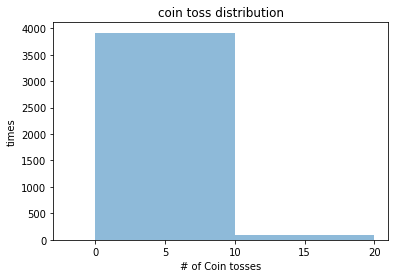

In [444]:


for i in range(1000):
  count_list.append(simulation(1000))


data = count_list

# fixed bin size
bins = np.arange(-100, 100, 10) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('coin toss distribution')
plt.xlabel('# of Coin tosses')
plt.ylabel('times')

plt.show()

In [ ]:
distribution

# Question 38: (Python)

**You are given the following [dataset](https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/stock_prices_ddi.csv), containing information on baby names from the U.S. Social Security Administration.**

**Using the dataset, write code to find the following**

- Number of unique names across the dataset, split by both # of unique male/female names
- Top 10 most popular male and female names, along with their associated counts
- The top 10 most trending names (% growth) from 2010+, with an associated plot to show the relative growth between names

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

baby_names = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv")
baby_names.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [3]:
print(' F:', len(baby_names[baby_names['gender'] == 'F']['name'].value_counts()), '\n',  'M:', len(baby_names[baby_names['gender'] == 'M']['name'].value_counts()))

 F: 67698 
 M: 41475


In [4]:
baby_names[baby_names['gender'] == 'F'][['name', 'count']].groupby('name').sum().sort_values(by=['count'], ascending=False).head(10)

,count
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


In [5]:
baby_names[baby_names['gender'] == 'M'][['name', 'count']].groupby('name').sum().sort_values(by=['count'], ascending=False).head(10)

,count
name,
James,5164280
John,5124817
Robert,4820129
Michael,4362731
William,4117369
David,3621322
Joseph,2613304
Richard,2565301
Charles,2392779


In [6]:
baby_names.head()

,year,name,gender,count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [11]:
baby_names['count'].mean()

179.68562057304734

# Question 39:  (SQL)

**Given the table below, called 'orders', write a SQL query to show the monthly revenue growth. To calculate the monthly revenue growth, you can apply the following logic:**

**_revenue growth = (current month's revenue-prior month's revenue)/prior month's revenue._**

|order_id|channel|date|month|revenue|
|---|---|---|---|---|
|1|online|2018-09-01|09|100|
|2|online|2018-09-03|09|125|
|3|in_store|2018-10-11|10|200|
|4|in_store|2018-08-21|08|80|
|5|online|2018-08-13|08|200|


# Question 40:  (Python)

**Given the following [dataset](https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv), calculate the average lifetime value of a customer.**

**Below are a couple of definitions to help solve the problem:**

- Lifetime value is average revenue divided by the churn rate
- Churn rate is defined as the total number of churned customers / total number of customers

**Additionally, here is code to import the relevant packages as well as the dataset shown above, to help get you started:**

In [1]:
#Importing packages
import pandas as pd
import numpy as np

#Read in the dataset
data = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv") 
#Convert these column types to int
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, downcast='integer', errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data.MonthlyCharges, downcast='integer', errors='coerce')

# Question 41: (Python, Stats)

**We'll cover a series of questions over the coming weeks around the following [study](https://www.ajpmonline.org/article/S0749-3797(07)00526-0/fulltext#tables) exploring the relationship between TV consumption and hypertension. Everything you'll need to know about the study is included below, and will be included in future questions.**

**Background:**

**Television viewing is strongly associated with an increased risk of childhood and adolescent obesity. However, the association between TV viewing and hypertension in children is unknown. This study aimed to identify whether TV watching is associated with hypertension in obese children.**

**Methods:**

**Children seen for obesity, aged 4 to 17 years, were evaluated at three pediatric centers from 2003 to 2005. In 2006–2007, a logistic regression model estimated the odds of hypertension for hours of daily TV time controlling for race, site, and body mass index (BMI) z-score.**

**Results:**

**A total of 546 subjects, with a metn age of 12 years, were evaluated. The children had a mean BMI of 35.5±9.3 kg/m2 (98.7th±0.8 percentile, z-score 2.54±0.4). TV time was positively correlated with the severity of obesity. After controlling for race, site, and BMI z-score, both the severity of obesity and daily TV time were significant independent predictors of the presence of hypertension. Children watching 2 to 4 hours of TV had 2.5 times the odds of hypertension compared with children watching 0 to 2 hours. The odds of hypertension for children watching 4 or more hours of TV were 3.3 times greater than for children watching 0 to 2 hours of TV.**

Data Table: 

|Characteristic| All subjects (N=546)| Subjects without hypertension (n=311)| Subjects with hypertension (n=235)|
|---|---|---|---|
|Age, mean, (SD), years| 11.9 (3.4)| 11.7 (3.5)| 12.3(3.3)|
|Gender, N(%)|
|Male|275(50.4)|160(51.4)| 115(48.9)|
|Female| 271(49.6)| 151(48.6)| 120(51.1)|
|Race/Ethnicity, N(%)|
|African American| 127(23.3)|64(20.6)|63(26.8)|
|Asian?Pacific Islander| 20(3.7)|12(3.9)|8(3.4)|
|Hispanic| 37(6.8)|23(7.4)|14{6.0)|
|Multiracial| 21(3.8)|15(4.8)|6(2.6)|
|White|287(52.6)|159(51.1)|128(54.5)|
|Other|54(9.9)|38(12.2)|16(6.8)|
|Blood Pressure (mm Hg)| 
|Systolic (mean, SD)a| 121.0(16.1)|110.0(10.4)|134.7(11.2)|
|Diastolic(mean, SD)a|65.3(9.3)| 61.9(8.4)|69.8(8.9)|
|BMI (kg/m2)|
|Mean (SD)a| 35.5(9.3)|33.9(8.5)|37.6(9.8)|
|Percentile, mean(SD)a|98.7(.8)|98.6(.9)|98.9(.5)|
|Z-score, mean(SD)a| 2.54(.4)|2.49(.5)|2.59(.4)|
|Hours of TV/day, Mean(SD)a| 3.1(1.8)| 2.8(1.7)| 3.6(1.8)|
|TV time categories, N(%)|
|0 to <2 hours / day| 121(22.2)| 94(30.2)|27(11.5)|
|2 to <4 hours/day| 202(37.0)| 115(37.0)| 87(37.0)|
|>- 4 hours /day|223(40.8)|102{32.8)|121(51.5)|

**Question: Refer to the data table shown above, and develop a hypothesis test to compare mean hours per day spent watching TV between subjects with and without hypertension (you're testing to see if there's a significant difference in the means). Walk through what test you chose and why, run your test (feel free to use tech here, doing it by hand is not needed), and share your conclusion.**



# Question 42: (Python, Regression)

**We're given the following [dataset](https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/nyc_east_river_bicycle_counts.csv), from [New York City Open Data](https://data.cityofnewyork.us/Transportation/Bicycle-Counts-for-East-River-Bridges/gua4-p9wg). The dataset shows the counts of bicycle crossings for each bridge along the East River for the month of April, along with weather and precipitation data, cut by day. This data is used by the New York City Department of Transportation for planning purposes, among other things.**

**Using this data, create a model to determine whether or not you can predict bicycle traffic for the given bridges, based on the variables provided (day of week, temperature, precipitation, etc).**

**Below is code to import the dataset into a Google Colab or Jupyter notebook to help get you started:**

In [3]:
# Here is code to pull the dataset and relevant libraries 
# into a Google Colab or Jupyter notebook to help get you started
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression


df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/nyc_east_river_bicycle_counts.csv')
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


# Question 43: (SQL)

**Suppose you work for a conglomerate that is constantly acquiring new companies. You're working with the human resource team to understand how many new emplooyees you're taking on. Each of the companies you are acquiring has the following organization structure:**


<img src="https://ci6.googleusercontent.com/proxy/213CoF0yNnNQ8lhLU0nYjmZA5Sxj5ScszkMgJ-O4wD2DAfQ3sCvYXZIJC477f98m3VV2TFzH2chzMg=s0-d-e1-ft#https://www.interviewqs.com/q157_p1.png" width="200" height="200" />


**You can assume that you have all this information in the following table:**

Table: allCompanyEmployees

|chief_executive_officer|vice_president| director|manager|individual_contributor|company_code|
|---|---|---|---|---|---|
|Johnny|Tammy|Lenny|Penny|Jim|abc|
|Johnny|Tammy|Lenny|Penny|Tim|abc|
|Johnny|Tammy|Lenny|Penny|Pam|abc|
|Michael|Pam|Jerry|Jimmy|Timmy|def|

**You can also assume that each individual's name is unique in the table for simplicity (similar to an employee ID or user name). Given the table, can you write a SQL query to print the compnay_code, CEO name (or ID), total number of vice presidents, total number of directors, total number of managers, and total number of individual contributors?**


# Question 44: (Python)

**Suppose we are given an array of n integers which represent the value of some stock over time. Assuming you are allowed to buy the stock exactly once and sell the stock once, what is the maximum profit you can make? Can you write an algorithm that takes in an array of values and returns the maximum profit?**

**For example, if you are fiven the following array:**

[2, 7, 1, 8, 2, 8, 14, 25, 14, 0, 4, 5]

**The maxumum profit you cn make is 24 because you would buy the stock when its price is 1 and sell when it's 25. Note that we cannot make 25,because the stock is priced at 0 after it is priced at 25 (e.g you can't sell before you buy).**

# Question 45: (Statistics)

**Suppose you're consulting for a school district, and the head of the school district thinks the students have above average intelligence. A random sample of thirty students have a mean IQ score of 112. Is there suficient evidence to support the head's claim?**

**You can assume the mean IQ score acros the population of all students (e.g. including the students outside the head's school district) is 100, with a standard deviation of 15.**

# Question 46: (Python)

**Suppose you're given a portfolio of equities and asked to calculate the 'value at risk' (VaR) via the variance-covariance method.**

**The VaR is a statistical risk management technique measuring technique measuring the maximum loss that an investment portfolio is likely to face within a specified time frame with a certain degree of confidence.  The VaR is a commonly calculated metric used within a suite of financial metrics and models to help aid in investment decisions.**

**In order to calculate the VaR of your portfolio, you can follow the steps below:** 

- Calculate periodic returns of the stocks in your portfolio
- Create a covariance matrix based on (1)
- Calculate the portfolio mean and standard deviation (weighted based on investment levels of each stock in the portfolio)
- Calculate the inverse of the normal cumulative distribution with a specified probability, standard deviation, and mean
- Estimate the value at risk for the portfolio by subtracting the initial investment from the calculation in step 4

**To help you get started, you can reference this [Google Colab](https://colab.research.google.com/drive/1dPrUZocrhG1dWyZP33jGaXiKg1oFSdpi) notebook with the historical returns for a portfolio of the following equities:**

['AAPL', 'FB', 'C', 'DIS']

# Question 47: (SQL)

**Given the following [dataset](https://docs.google.com/spreadsheets/d/1YxZzzOsVasqj-AvPp2g6Fr3RKQyIQDXUDyYvEfZjtgo/edit#gid=0), can you write a SQL query that returns the top 3 performing ad groups each day?**

**Here we'll define performance as the ratio between revenue and spend (e.g revenue/ spend). Inn other words, the higher the ratio the better the performance. The output of the query will be the date and an array of the ad groups.**

In [1]:
%SQL

UsageError: Line magic function `%SQL` not found.


# Question 48: (Python)

**Given an array of distinct integers, write code to find length of the longest subarray which ocntains numbers that can be arranged in a continuous sequence.**

**For example:**

Input: arr[] = {10, 12, 11};

Output: 3

--------------------------------
Input: arr[] = {14, 12, 11, 20};

Output: 2

--------------------------------

Input: arr[] = {1, 10, 23, 11, 13, 14, 15, 12, 98};

Output: 5


# Question 49: (Statistics)

**Suppose you have two differenct bags of M&Ms, one is a special Christmas edition while the other is a standard bag of M&Ms. The Christmas edition contains only red, green and white M&Ms while the standard bag contains the full color offering. The distribuions of drawing a given color are below:**

Christmas bag of M&Ms

- Green: 30%
- Red: 40%
- White: 30%

Standard bag of M&Ms

- Green: 20%
- Orange: 19%
- Blue: 19%
- Red: 15%
- Yellow: 14%
- Brown: 13%

**You are given an M&M from each bag, but you do not know which M&M came from which bag. One M&M is red and one is Green. What is the probability that the Red M&M came from the Standard bag?**

# Question 50: (Python)

**The following [dataset contains the following fields that describe the online transaction:**

- user_id: unique id of user
- signup_time: time that the user created account
- purchase_time: time of the transaction
- purchase_value: amount of the transaction
- device_id: device that user conducted transaction on
- source: attribution channel for the transaction
- browser: browser that user conducted transaction on
- sex: gender of the user
- age: age of the user
- ip_address: IP address of the purchase
- is_fraud: if the transaction is flagged as fraudulent

**Can you describe the major differences between the non-fraud vs fraud transactions?**

**More specifically, can you create histograms for purchase value, time between sign up and purchase time, and age -- with fraud/non-fraud differentiated on the same chart?**
